# Fitting a function to histogram

In the exercise we will make a Breit-Wigner fit to invariant mass histogram. With the fitted Breit-Wigner function it will be possible to determine the mass and the lifetime of a Z boson.

In high-energy physics, a common distribution function used to describe the distribution of invariant masses is the relativistic Breit-Wigner function that writes as:

$$
f(E) = \frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant that can be expressed as:

$$
K = \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}}
$$

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

If we also want to include the background events to the fit, we must add additional parameters $a$, $b$ and $A$ to the distribution function. Together with the background event parameters, the distribution function becomes

$$
f(E) = aE+b+A\frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

By using curve_fit method from scipy-module, we can find optimal parameters for Breit-Wigner distribution to obtain best fit for our histogram. Your task is to fit the Breit-Wigner distribution to the invariant mass histogram for invariant mass range of (70 GeV, 110 GeV).

## Fitting a function to the histogram

### Part 1: Invariant mass histogram and bin centers

In this exercise, we will use the same dataset "DoubleMuRun2011A.csv" from previous weeks. First, plot a histogram of the invariant masses in the dataset. Limit your plot to invariant mass range from 70 to 110 GeV. Use 100 bins and save the bin heights and locations to variables (see https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html for more information of the return values).

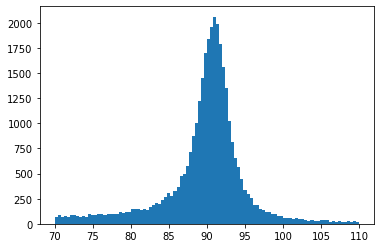

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("DoubleMuRun2011A.csv")
heights, bins, patches = plt.hist(data.M, bins=100, range=(70,110))
plt.show()

In general, when we want to fit a function to a histogram, we want to use the bin centers as our x-axis data values. However, the plt.hist() function returns the locations of the left edges of bins. Therefore, we need a function that converts the locations of bin edges to bin centers to make the fit more accurate.

<h3>Function that returns the bin centers</h3><p><br></p><p>Write a python function <b>bin_centers( bins )</b> that takes a list of bin edges as argument and <b>returns the bin centers</b>.<br><p>
    
Then save the bin centers of your histogram to a variable.

In [95]:
# possible solution

def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
bins = bin_centers(bins)

In [89]:
# TESTS FOR CODERUNNER

# test1, evenly spaced positive values
bins = [0, 1, 2, 3, 4, 5]
print(bin_centers(bins))
# expected output: [0.5, 1.5, 2.5, 3.5, 4.5]

# test2, evenly spaced mixed values
bins = [-10, -6, -2, 2, 6, 10]
print(bin_centers(bins))
# expected output: [-8.0, -4.0, 0.0, 4.0, 8.0]

# test3, real data
import numpy as np
import pandas as pd
data = pd.read_csv('DoubleMuRun2011A.csv')
data_filtered = data[(data.M <= 100) & (data.M >= 80)]
inv_mass = data_filtered.M
histtest, binstest = np.histogram(inv_mass,bins=10)
print(bin_centers(bins))
# expected output: [81.001835, 83.001505, 85.00117499999999, 87.000845, 89.00051500000001, 91.000185, 92.999855, 94.999525, 96.999195, 98.998865]

# test4, unevenly spaces values (optional test, fails will most likely be here)
bins = [0,1,3,9,21,52]
print(bin_centers(bins))
# expected output: [0.5, 2.0, 6.0, 15.0, 36.5]

# other optional tests: empty list, list with only 1 element (use this if you want to be mean)

[0.5, 1.5, 2.5, 3.5, 4.5]
[-8.0, -4.0, 0.0, 4.0, 8.0]
[-8.0, -4.0, 0.0, 4.0, 8.0]
[0.5, 2.0, 6.0, 15.0, 36.5]


### Part 2 - Breit-Wigner distribution function

Now before we can fit Breit-Wigner distribution to our histogram, we need to actually define the function.

Define a function **breitwigner( E, gamma, M, a, b, A )** that **returns the Breit-Wigner distribution function** and also takes into account the **background events**.

In [159]:
# possible solution

def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [92]:
# TESTS FOR CODERUNNER

# test1: a=b=0, A=1:
print("{0:.3f} {1:.3f} {2:.3f}".format(breitwigner(1,1,1,0,0,1),breitwigner(0,1,1,0,0,1),breitwigner(0,0,1,0,0,1)))
# expected output: 0.819 0.410 0.000

# test2: a=b=A=1:
print("{0:.3f} {1:.3f} {2:.3f}".format(breitwigner(1,1,1,1,1,1),breitwigner(0,1,1,1,1,1),breitwigner(0,0,1,1,1,1)))
# expected output: 2.819 1.410 1.000

# test3: real fit parameters
print("{0:.3f}".format(breitwigner(90.877, 4.233, 90.877, -2.131, 199.980, 13830.268)))
# expected output: 2088.161

0.819 0.410 0.000
2.819 1.410 1.000
2088.008


### Part 3 - Fitting Breit-Wigner distribution to histogram

Finally, it is time to fit the distribution function to our histogram. Use **curve_fit()**-function from scipy.optimize module and find the optimal parameters for the Breit-Wigner distribution. Note that you need some initial guess to get any reasonable optimized parameters from curve_fit function. For the background parameters, you can use for example the following guesses: $a=-1$, $b=100$ and $A=10000$. You can increase the accuracy of the optimization by iterating the process and using the optimized coefficients from previous iteration as your initial guess.

Once you have the optimized parameters, plot the distribution and your histogram to confirm that the fit is good. If the doesn't seem to describe the histogram well, try using different initial guess. Print the parameters and their errors ( np.sqrt(np.diag(covariance)) ).

gamma = 4.233 +/- 0.053
M     = 90.877 +/- 0.016
a     = -2.131 +/- 0.272
b     = 199.980 +/- 24.776
A     = 13830.258 +/- 143.999


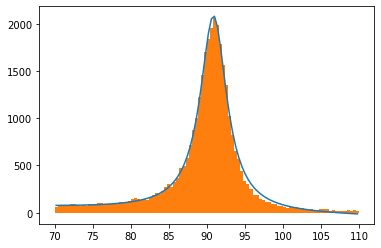

In [158]:
from scipy.optimize import curve_fit

p0 = [5, 90, -1, 100, 10000]
for i in range(100):
    best, covariance = curve_fit(breitwigner, bins, heights, p0=p0)
    p0 = best

plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=100, range=(70,110))
errors = np.sqrt(np.diag(covariance))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

### Part 4 - Analysing the fit

Calculate the lifetime of Z-boson based on the results you obtained in part 3.

In [152]:
# lifetime
hbar = 6.582e-25 # GeV*s
gamma = best[0]
errgamma = errors[0]
tau = hbar/gamma
error = max(hbar/(gamma-errgamma)-tau,tau-hbar/(gamma+errgamma))

print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))

tau = 1.55505E-25 s +/- 1.95860E-27 s


# Week 4 material?

## Effect of pseudorapidity to the mass distribution


In this final section it will be shortly studied how does pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution.

As it was told in the theory part, pseudorapidity $\eta$ describes an angle of which the detected particle has differed from the particle beam (z-axis). Pseudorapidity is determined with the angle $\theta$ mentioned before with the equation

$$
\eta = -\ln(\tan(\frac{\theta}{2}))
$$

For recap the image 1 is shown again below. From the image one can see that a small pseudorapidity in practice means that the particle has differed lot from the particle beam. And vice versa: greater pseudorapidity means that the particle has continued almost among the beam line after the collision.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 1: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

The image 2 below shows a situation where two particle beams from left and right collide. The image shows two muons with different pseudorapidities. The muon with the smaller pseudorapidity hits the barrel part of the detector when the muon with the greater pseudorapidity goes to the endcap of the detector. There are also muon chambers in the both ends of the detector so these muons can also be detected.

<figure>
    <img src="../images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 2: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

In this final section it will be studied that how does pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution. For doing that, two different histograms will be made: an one with only muon pairs with small pseudorapidities and an one with great pseduorapidities. The histograms will be made with the familiar method from the earlier part of this exercise.

### Selecting the events

Next let’s create two variables for dividing the events: `small_etas` and `great_etas`. To the first one will be saved only collision events where pseudorapidities of the both detected muons have been small (for example under 0.38). And respectively to the second those whose pseudorapidities have been great (for example over 1.52). Absolute values will be used because $\eta$ can get also negative values.

Complete the code cell below by determining the variables `small_etas` and `great_etas` in a way that the division described above will be made. You will need the following functions:

- `ds[condition]` selects from the variable `ds` only events which fulfill the condition written inside the brackets. There can also be more than one condition. Then the function is in the form `ds[(condition1) & (condition2)]`
- an example of this could be a function where from the variable `example` only rows where the values of the columns `a` and `b` have been both greater than 8 would be selected: `example[(example.a > 8) & (example.b > 8)]`
- you can get the absolute values with the function `np.absolute()` from the _numpy_ module
- pseudorapidity of the first muon is `ds.eta1` and the second `ds.eta2`
- ”greater than” and ”smaller than” comparisons can be made in Python straight with the symbols > and <
- Python uses a dot as a decimal separator (for example 0.38)

In [ ]:
# Let's import the needed modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# With this line the data is imported and saved to the variable "ds".
ds = pd.read_csv('DoubleMuRun2011A.csv')

great_etas = #OTHER SELECTION HERE
small_etas = #OTHER SELECTION HERE

# Let's print out some information about the selection
print('Amount of all events = %d' % len(ds))
print('Amount of the events where the pseudorapidity of the both muons have been large = %d' %len(great_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small = %d' %len(small_etas))

### Creating the histograms


Run the code cell below to create separate histograms from the events with small and with great values of pseudorapidities. The cell will get the invariant masses for both of the selections and will create the histograms out of them near to the peak that refers to the Z boson.

Your final task is to plot the two histograms. After that fit both plots with the Breit-Wigner fit and study the differences betheen the high and low eta regions.

In [ ]:
# Let's differ the invariant masses of the large and small pseudorapidity
# events for making the histograms.
inv_mass_great = great_etas['M']
inv_mass_small = small_etas['M']

# Let's use the matplotlib.pyplot module to create a custom size
# figure where the two histograms will be plotted.
f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)
plt.subplot(211)
plt.hist(inv_mass_great, bins=120, range=(60,120))
plt.ylabel('great etas, number of events', fontsize=20)
plt.subplot(212)
plt.hist(inv_mass_small, bins=120, range=(60,120))
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

### Question 3

Compare the two histograms and two fits that you created above. In which way the pseudorapidities of the muons affect to the mass distribution?

What could possibly explain your observations?

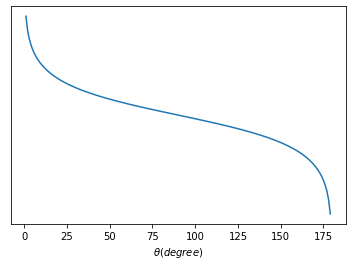

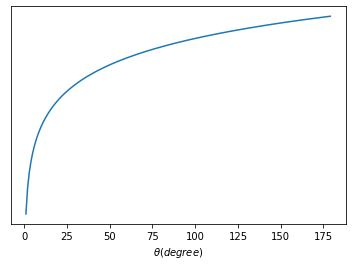

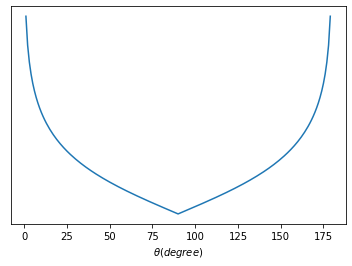

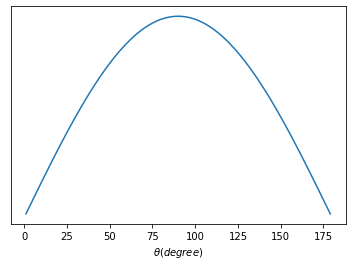

In [35]:
# plot pseudorapidity for theta=[1,179] degrees.

import numpy as np
import matplotlib.pyplot as plt

theta_deg = np.linspace(1,179,179)
theta_rad = np.radians(theta_deg)

# Correct answer
eta = -np.log(np.tan(theta_rad/2))

# Fake answers for moodle question
eta_fake1 = np.log(theta_rad/8)
eta_fake2 = np.abs(-np.log(np.tan(theta_rad/2)))
eta_fake3 = np.sin(theta_rad)

etas = [eta, eta_fake1, eta_fake2, eta_fake3]

n=0
for eta in etas:
    plt.figure()
    plt.plot(theta_deg,eta)
    plt.xlabel(r'$\theta (degree)$')
    plt.yticks([])
    if n==0:
        figname = 'pseudorapidity.png'
    else:
        figname = 'fake_pseudorapidity_{}.png'.format(n)
    plt.savefig(figname)
    n+=1

plt.show()